In [9]:
import cv2
import os
import shutil
import torch,torchvision
import math
import pandas
import natsort
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
import numpy as np
from PIL import Image, ImageFilter
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path = "/content/drive/MyDrive/BinarySplit"

In [ ]:
path = path
class_dirs = os.listdir(path)

In [12]:
for c in class_dirs:
    c_path = os.path.join(path, c)
    img_files = os.listdir(c_path)
    numb_images = len(img_files)
    img_path = os.path.join(c_path, img_files[0])
    img = Image.open(img_path)
    img_size = img.size
    num_channels = len(img.getbands())
    storage_format = img.format
    print("Class:", c)
    print("Image size:", img_size)
    print("Number of images:", numb_images)
    print("Number of channels:", num_channels)
    print("Image format:", storage_format)

Class: GreaterThan29
Image size: (200, 200)
Number of images: 10308
Image format: JPEG
Number of channels: 3

Class: LessThan28
Image size: (200, 200)
Number of images: 9663
Image format: JPEG
Number of channels: 3



In [13]:
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
face_dataset = ImageFolder(path, transform=transforms)

In [ ]:
def standard_dev(dataset):
    class_counting = torch.zeros(len(dataset.classes))
    class_std = torch.zeros(len(dataset.classes))
    for i in range(len(dataset)):
        img, label = dataset[i]
        class_std[label] += torch.std(img)
        class_counting[label] += 1
    for i in range(len(dataset.classes)):
        class_std[i] /= class_counting[i]
    return class_std
utkface_std = standard_dev(face_dataset)

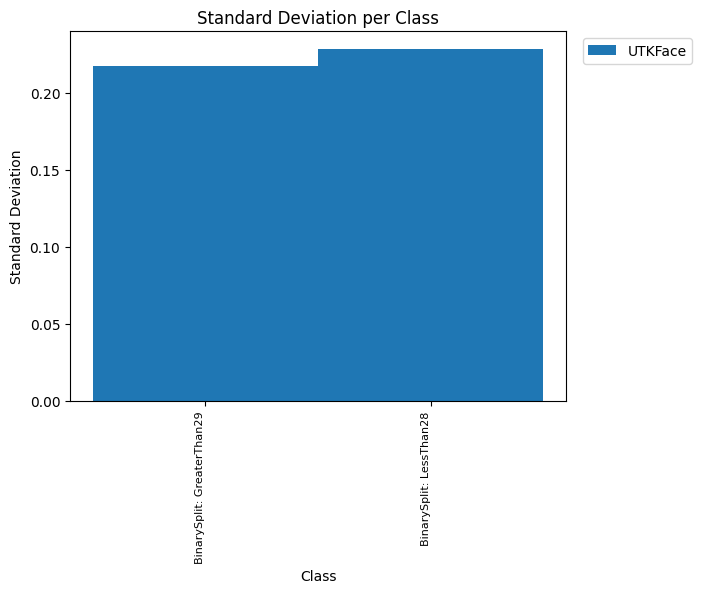

In [15]:
def plot_standard_dev(*std_per_class_datasets):
    fig= plt.subplots()
    abels = []
    width = 1.0 / len(std_per_class_datasets)
    ax=plt.subplots()
    x = []
    dataset_names = []
    for i, (std_per_class, dataset) in enumerate(std_per_class_datasets):
        dataset_name = os.path.basename(dataset.root.rstrip('/'))
        class_counting = len(dataset.classes)
        x += [j + (i - 0.5) * width for j in range(class_counting)]
        labels += [f"{dataset_name}: {c}" for c in dataset.classes]
        dataset_names.append(dataset_name.replace('BinarySplit', 'UTKFace'))
        ax.bar(x[-class_counting:], std_per_class, width=width)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90, ha='right', fontsize=8)
    ax.set_xlabel('Class')
    ax.set_ylabel('Standard Deviation')
    ax.set_title('Standard Deviation per Class')
    ax.legend(dataset_names, bbox_to_anchor=(1.02, 1), loc='upper left')
plot_standard_dev((utkface_std, face_dataset))
plt.show()